In [1]:
# project: p1
# submitter: kkhill4
# partner: none
# hours: 15

In [2]:
# import statements
import os
import json
import copy
import pandas as pd
import csv
import subprocess
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Q1
ans1 = 7/2
type(ans1)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (x < 5) or (x > 10) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = word.lower()[5:] == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
#check_sum function
def check_sum(x=0, y=0, total=0):
    if x + y == total:
        return True
    else:
        return False

In [7]:
#Q4
check_sum(0.1, 0.2, 0.3)

False

In [8]:
#Q5
check_sum(-1,1)

True

In [9]:
#Q6
x = 4
if x % 2 == 1:
    status = "odd"
elif x % 2 == 0:
    status = "even"
else:
    status = "non-integer"
status

'even'

In [10]:
#nums list
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
#smart_sum function
def smart_sum(nums_list):
    current_sum = 0
    for x in nums_list:
        if x<0:
            continue
        else:
            current_sum += x
        if current_sum + x > 20:
            break
    return current_sum

In [12]:
#Q7
smart_sum(nums)

14

In [13]:
#Q8
smart_sum([2,1,-11,3,15,-1,8,2])

21

In [14]:
#Python State (Part 2)
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7, "w": 6}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]
{"A":1, "B":2} == {"B":2, "A":1}

True

In [15]:
#Q9
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [16]:
#Q10
rows[0][-1]["x"]

8

In [17]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [18]:
#Q12
column_index = header.index("B")
sum_b_column = 0
for row in rows:
    sum_b_column += row[column_index]
sum_b_column

412

In [19]:
def get_column_a(row):
    print("lookup A column for a row")
    return row[header.index("A")]

rows.sort(key=get_column_a, reverse=True)
rows

lookup A column for a row
lookup A column for a row
lookup A column for a row


[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}]]

In [20]:
#Q13
rows.sort(key = lambda row:row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [21]:
#Q14
#!wget https://www.floatrates.com/usd.json-feeds.html
file = open("usd.json")
data = json.load(file)
file.close()

usd = round((1000 * (data["cad"]["rate"])), 2)
usd

1352.21

In [22]:
# divide function
def divide(number_1, number_2):
    while True:
        try: 
            return number_1 / number_2
            break
        except ZeroDivisionError:
            return float("nan")

In [23]:
#Q15
ans15 = divide(3,2)
ans15

1.5

In [24]:
#Q16
ans16= divide(0,0)
ans16

nan

In [25]:
os.listdir("home-computers")

['ACSDT5Y2018.B28001-Data.csv',
 'ACSDT5Y2021.B28001-Data.csv',
 'ACSDT5Y2017.B28001-Data.csv',
 'ACSDT5Y2020.B28001-Data.csv',
 'ACSDT5Y2019.B28001-Data.csv',
 '.ipynb_checkpoints']

In [26]:
def process_csv(filename):
    with open(filename, encoding = "utf-8") as example_file:
        example_reader = csv.reader(example_file)
        example_data = list(example_reader)
    return example_data

In [27]:
years = {}
directory = os.listdir("home-computers")
for file in directory:
    year_str = file[7:11]
    try:
        year = int(year_str)
        df = process_csv(os.path.join("home-computers", file))
        df = pd.DataFrame(df[1:])
        df.columns = df.iloc[0]
        df.set_index("Geographic Area Name", inplace=True)
        df = df[1:]
        years[year] = df
    except ValueError:
        print(f"Skipping file {file} because it doesn't contain a valid year.")

Skipping file .ipynb_checkpoints because it doesn't contain a valid year.


In [28]:
#Q17
sorted_years = sorted(years.keys())
sorted_years

[2017, 2018, 2019, 2020, 2021]

In [29]:
#Q18
df_2021 = years[2021]
int(df_2021.at["Wisconsin","Estimate!!Total"])

2401818

In [30]:
#Q19
ans19 = pd.to_numeric(df_2021["Estimate!!Total!!No Computer"])
ans19.sum()

8902093

In [31]:
#Q20
no_comp = pd.to_numeric(df_2021["Margin of Error!!Total!!No Computer"])
margin_error = no_comp / ans19
margin_error.max()

0.07836701790752577

In [32]:
#Q21
states = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
midwest = {state: (int(df_2021.loc[state, 'Estimate!!Total!!No Computer']) / int(df_2021.loc[state, 'Estimate!!Total'])) * 100 for state in states}
midwest

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

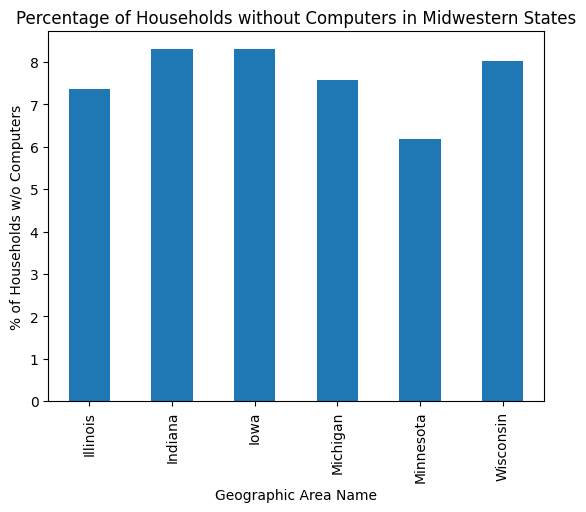

In [33]:
#Q22
midwest_series = pd.Series(midwest)
midwest_series.plot(kind = "bar")
plt.xlabel("Geographic Area Name")
plt.ylabel("% of Households w/o Computers")
plt.title("Percentage of Households without Computers in Midwestern States")
plt.show()

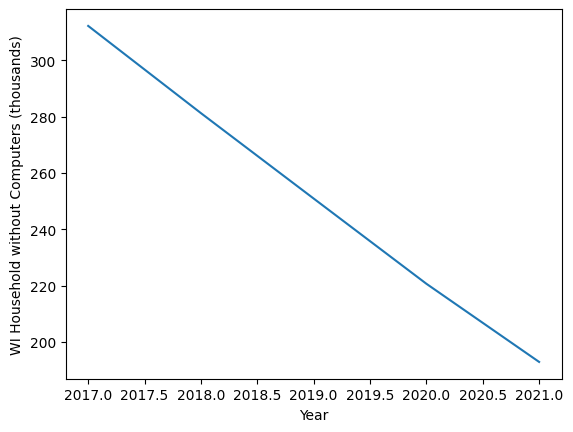

In [34]:
#Q23
dic = {}

for year in sorted_years:
    wocomp = int(years[year]['Estimate!!Total!!No Computer']['Wisconsin'])/ 1000
    dic[year] = wocomp
    
plot = pd.Series(dic).plot.line()
plot.set_ylabel('WI Household without Computers (thousands)')
plot.set_xlabel('Year')
None

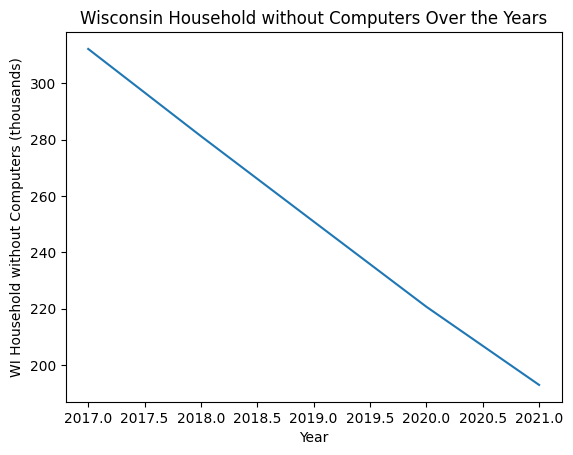

In [35]:
dic = {}

for year in sorted_years:
    no_comp = int(years[year]["Estimate!!Total!!No Computer"]["Wisconsin"]) / 1000
    dic[year] = no_comp

years_series = pd.Series(dic)

years_series.plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("WI Household without Computers (thousands)")
plt.title("Wisconsin Household without Computers Over the Years")
plt.show()


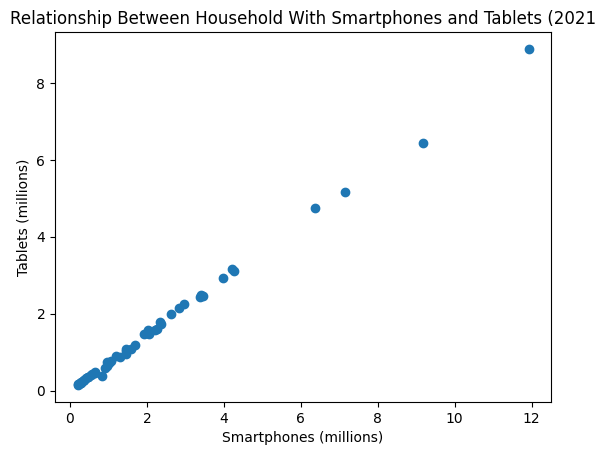

In [36]:
#Q24
smartphones_col = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
tablets_col = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"

smartphones_millions = df_2021[smartphones_col].astype(float) / 1e6
tablets_millions = df_2021[tablets_col].astype(float) / 1e6
plt.scatter(smartphones_millions, tablets_millions)
plt.xlabel("Smartphones (millions)")
plt.ylabel("Tablets (millions)")
plt.title("Relationship Between Household With Smartphones and Tablets (2021")
plt.show()


In [37]:
#Q25
flask_repo_dir = '/home/Konnor-windows$/CS320-FA23/p1/flask'
subprocess.check_call(["git", "checkout", "main"], cwd=flask_repo_dir)
output = subprocess.check_output(["git", "log"], cwd=flask_repo_dir)
output_string = output.decode("utf-8")
output_lines = output_string.split("\n")
first_line = output_lines[0]
print(first_line)

Your branch is up to date with 'origin/main'.
commit 660994efc761efdfd49ca442b73f6712dc77b6cf


Already on 'main'


In [38]:
#Q26
commit_nums = subprocess.check_output(["git", "log", "--format=%H"], cwd="flask", encoding="utf-8").split("\n")
filtered_commits = [commit.strip() for commit in commit_nums if commit.strip()]
first_10_commits = filtered_commits[-10:]
first_10_commits

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [39]:
#Q27
#commit_100 = [commit.strip() for commit in output if commit.strip()][-100]
#subprocess.check_output(["git", "checkout", commit_100], cwd = "flask")
#with open("flask/README", "r", encoding = "utf-8") as readme_file:
#    content = readme_file.read()
#content 

In [40]:
#Q28
subprocess.check_output(["git", "checkout", "main"], cwd="flask")
output = subprocess.check_output(["git", "log"], cwd="flask", text=True).split("\n")

user_counts = {}

for line in output:
    if "Merge pull request" in line and "/" in line:
        parts = line.split("/")
        index = parts[0].find("from") + len("from")
        username = parts[0][index:].strip()
        user_counts[username] = user_counts.get(username, 0) + 1
users_dict = {key: value for key, value in user_counts.items() if value >= 10}
users_dict

Already on 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [41]:
#Q29
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr = subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output

ans_str = str(msg, encoding ="utf-8")
ans_str

'ERROR: unknown command "instal" - maybe you meant "install"\n'

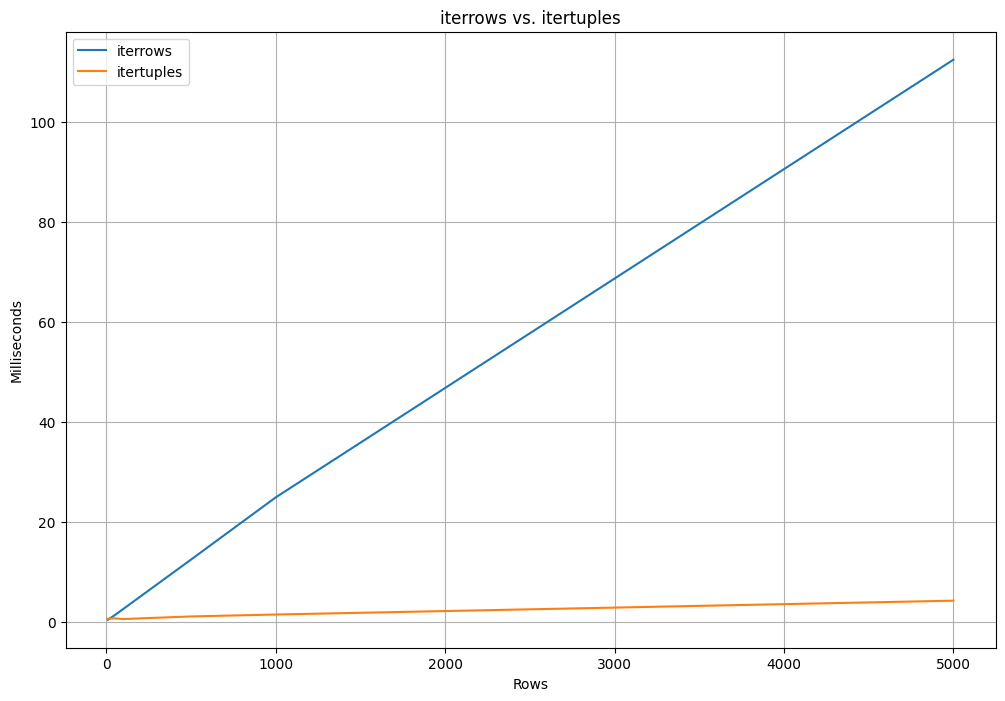

In [42]:
#Q30 
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
timing_results_rows = []
timing_results_tuples = []
row_counts = [10, 50, 100, 500, 1000, 5000]

for rows in row_counts:
    df = rand_df(rows)

    t0 = time.time()
    for _, row in df.iterrows():
        pass
    t1 = time.time()
    timing_results_rows.append((rows, (t1 - t0) * 1000))

    t0 = time.time()
    for row in df.itertuples(index=False):
        pass
    t1 = time.time()
    timing_results_tuples.append((rows, (t1 - t0) * 1000))

iterrows_df = pd.DataFrame(timing_results_rows, columns=["Rows", "Time (ms)"])
itertuples_df = pd.DataFrame(timing_results_tuples, columns=["Rows", "Time (ms)"])

plt.figure(figsize=(12, 8))
plt.plot(iterrows_df["Rows"], iterrows_df["Time (ms)"], label="iterrows")
plt.plot(itertuples_df["Rows"], itertuples_df["Time (ms)"], label="itertuples")
plt.xlabel("Rows")
plt.ylabel("Milliseconds")
plt.title("iterrows vs. itertuples")
plt.legend()
plt.grid(True)
plt.show()

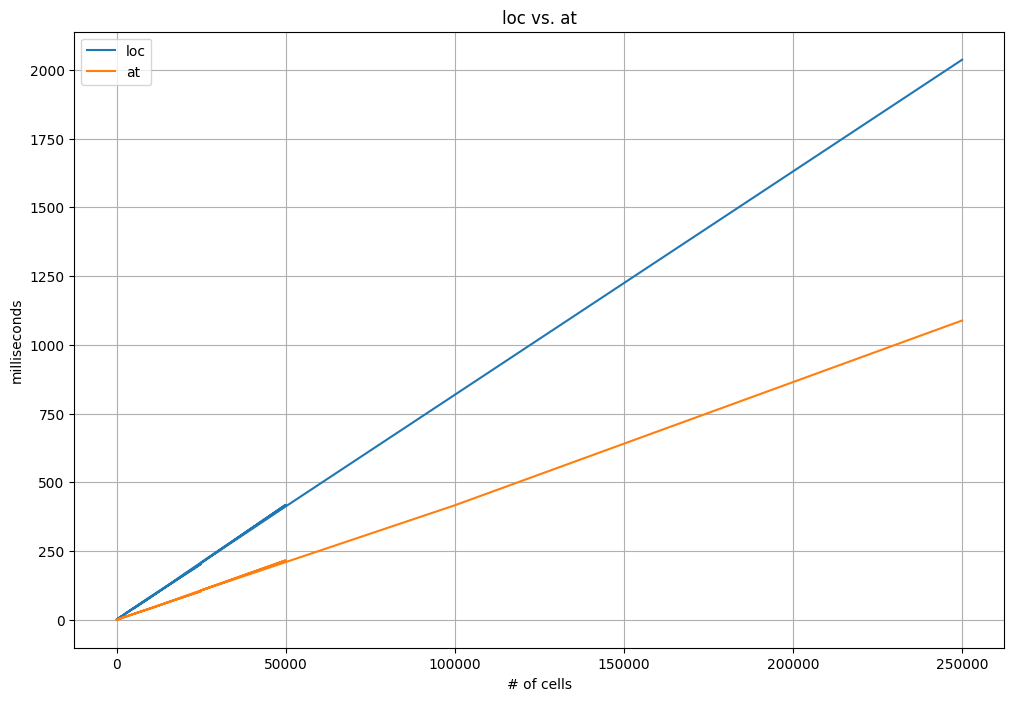

In [43]:
#Q31
def rand_df(rows, cols):
    return pd.DataFrame(np.random.randint(10, size=(rows, cols)))

timing_results_loc = []
timing_results_at = []
row_counts = [10, 50, 100, 500, 1000, 5000]
col_counts = [5, 10, 20, 50]

for rows in row_counts:
    for cols in col_counts:
        df = rand_df(rows, cols)

        t0 = time.time()
        total = 0
        for idx in df.index:
            for col in df.columns:
                total += df.loc[idx, col]
        t1 = time.time()
        timing_results_loc.append((rows * cols, (t1 - t0) * 1000))

        t0 = time.time()
        total = 0
        for idx in df.index:
            for col in df.columns:
                total += df.at[idx, col]
        t1 = time.time()
        timing_results_at.append((rows * cols, (t1 - t0) * 1000))

loc_df = pd.DataFrame(timing_results_loc, columns=["Cells", "Time (ms)"])
at_df = pd.DataFrame(timing_results_at, columns=["Cells", "Time (ms)"])

plt.figure(figsize=(12, 8))
plt.plot(loc_df["Cells"], loc_df["Time (ms)"], label="loc")
plt.plot(at_df["Cells"], at_df["Time (ms)"], label="at")
plt.xlabel("# of cells")
plt.ylabel("milliseconds")
plt.title("loc vs. at")
plt.legend()
plt.grid(True)
plt.show()

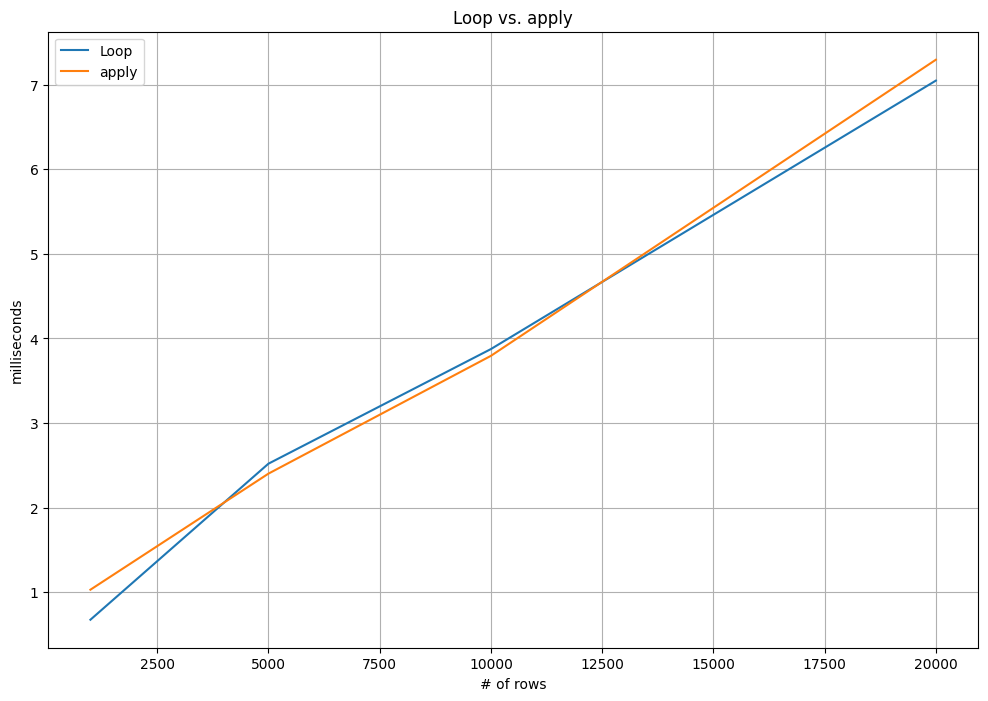

In [44]:
#Q32
def rand_df(rows):
    return pd.DataFrame({"A": np.random.randint(10, size=rows)})
def laugh(x):
    return "qwerty" * x

timing_results_loop = []
timing_results_apply = []
row_counts = [1000, 5000, 10000, 20000]

for rows in row_counts:
    df = rand_df(rows)
   
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    timing_results_loop.append((rows, (t1 - t0) * 1000))

    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    timing_results_apply.append((rows, (t1 - t0) * 1000))

loop_df = pd.DataFrame(timing_results_loop, columns=["Rows", "Time (ms)"])
apply_df = pd.DataFrame(timing_results_apply, columns=["Rows", "Time (ms)"])

plt.figure(figsize=(12, 8))
plt.plot(loop_df["Rows"], loop_df["Time (ms)"], label="Loop")
plt.plot(apply_df["Rows"], apply_df["Time (ms)"], label="apply")
plt.xlabel("# of rows")
plt.ylabel("milliseconds")
plt.title("Loop vs. apply")
plt.legend()
plt.grid(True)
plt.show()